Sum of variance of raw scores for each subject
923.66
Variance of principal component scores
844.45
Contribution rate (divide [variance of principal component score] by [sum of variance of raw scores for each subject])
0.91
Contribution ratio easily found with scikit-learn function
0.91
Principal component load (second principal component)
[[ 0.76  0.24  0.2  -0.53 -0.24]]
Compare the first and second principal component load
The first   [[0.49 0.17 0.2  0.83 0.07]]
The second  [[ 0.76  0.24  0.2  -0.53 -0.24]]
Sum of variance of raw scores for each subject
923.66
Variance of principal component score (1st)
844.45
Contribution rate
0.91
Contribution ratio of second principal component
0.05
Cumulative contribution
0.96
Compare the first and second principal component load
The first   [[0.49 0.17 0.2  0.83 0.07]]
The second  [[ 0.76  0.24  0.2  -0.53 -0.24]]


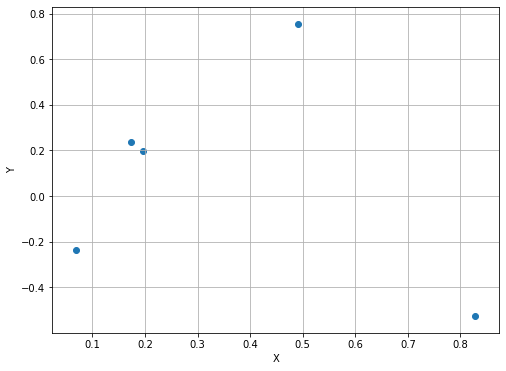

0 149.94 16.00
1 90.05 4.36
2 130.60 12.01
3 97.36 8.44
4 129.74 21.97
5 146.48 10.75
6 37.88 17.66
7 107.63 28.43
8 119.24 17.19
9 85.76 24.44
10 64.50 7.83
11 69.97 24.13
12 84.45 24.84
13 110.94 19.49
14 91.66 13.20
15 64.16 7.76
16 76.24 14.91
17 107.48 15.63
18 136.32 12.22
19 99.09 7.78


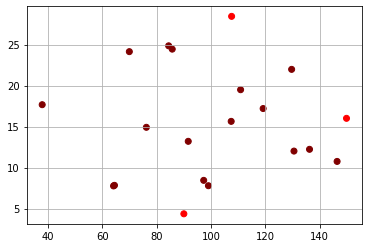

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm # Colors  at the time of display
plt.figure(figsize = (8, 6)) # Preparation for display

# Each column is in the order of mathematics, science, society, English, Japanese
all_test_data=np.array([[71,64,83,100,71],[34,48,67,57,68],[58,59,78,87,66],[41,51,70,60,72],[69,56,74,81,66],[64,65,82,100,71],[16,45,63,7,59],[59,59,78,59,62],[57,54,84,73,72],[46,54,71,43,62],[23,49,64,33,70],[39,48,71,29,66],[46,55,68,42,61],[52,56,82,67,60],[39,53,78,52,72],[23,43,63,35,59],[37,45,67,39,70],[52,51,74,65,69],[63,56,79,91,70],[39,49,73,64,60]])
np.set_printoptions(precision=2) # Number of decimal places
number_of_examinees=all_test_data.shape[0] # The number of rows in all test data is the number of examinees
pca=PCA(n_components=2) # Create PCA instance (reduce to 2D)
pca.fit(all_test_data) # Principal component analysis (unsupervised learning)
principal_component_load = -1*pca.components_[[0],:] # Only the first principal component
Principal_component_scores_for_each_examinees=all_test_data.dot(principal_component_load.T)


print("Sum of variance of raw scores for each subject")
sum_of_variance_raw_scores_for_each_subject=np.sum(np.var(all_test_data, axis=0))
print('{0:.2f}'.format(sum_of_variance_raw_scores_for_each_subject)) # Sum of variances of raw scores for all subjects
print("Variance of principal component scores")
variance_of_principal_component_scores=np.var(Principal_component_scores_for_each_examinees)
print('{0:.2f}'.format(variance_of_principal_component_scores))
print("Contribution rate (divide [variance of principal component score] by [sum of variance of raw scores for each subject])")
print('{0:.2f}'.format(variance_of_principal_component_scores/sum_of_variance_raw_scores_for_each_subject))


print("Contribution ratio easily found with scikit-learn function")
print('{0:.2f}'.format(pca.explained_variance_ratio_[0])) # First principal component contribution rate


principal_component_load_for_the_second_principal_component=pca.components_[[1],:] # Only second principal component
print("Principal component load (second principal component)")
print(principal_component_load_for_the_second_principal_component)


##### Compared to the first and interpret the second principal component 
principal_component_load_for_the_first_principal_component=principal_component_load
print("Compare the first and second principal component load")
print("The first  ",principal_component_load_for_the_first_principal_component) 
print("The second ",principal_component_load_for_the_second_principal_component) 


# Remember the contribution of the first principal component
print("Sum of variance of raw scores for each subject")
sum_of_variance_raw_scores_for_each_subject=np.sum(np.var(all_test_data, axis=0))
print('{0:.2f}'.format(sum_of_variance_raw_scores_for_each_subject)) # Sum of variances of raw scores for all subjects
print("Variance of principal component score (1st)")
variance_of_first_principal_component_score=np.var(Principal_component_scores_for_each_examinees)
print('{0:.2f}'.format(variance_of_first_principal_component_score))
print("Contribution rate")
print('{0:.2f}'.format(variance_of_first_principal_component_score/sum_of_variance_raw_scores_for_each_subject))


print("Contribution ratio of second principal component")
print('{0:.2f}'.format(pca.explained_variance_ratio_[1])) # Contribution ratio of second principal component


print("Cumulative contribution")
print('{0:.2f}'.format(np.sum(pca.explained_variance_ratio_))) # Sum of contribution ratio


############# Evaluate each subject from principal component load
print("Compare the first and second principal component load")
print("The first  ",principal_component_load_for_the_first_principal_component) 
print("The second ",principal_component_load_for_the_second_principal_component) 
# For each subject, the first principal component load is displayed on the X axis, 
# and the second principal component load is displayed on the Y axis
plt.scatter(principal_component_load_for_the_first_principal_component,principal_component_load_for_the_second_principal_component) 
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


############ Evaluate each examinees from the principal component score
Principal_component_scores_for_each_examinees_first=all_test_data.dot(principal_component_load_for_the_first_principal_component.T).flatten()
Principal_component_scores_for_each_examinees_second=all_test_data.dot(principal_component_load_for_the_second_principal_component.T).flatten()

for examinees_numbers in range(number_of_examinees):
    print(examinees_numbers,'{0:.2f}'.format(Principal_component_scores_for_each_examinees_first[examinees_numbers]),'{0:.2f}'.format(Principal_component_scores_for_each_examinees_second[examinees_numbers]))

# An array of colors (for changing the color of a particular examinee to make it stand out)    
y=[0.5,0.5,1,1,1,1,1,0.5,1,1,1,1,1,1,1,1,1,1,1,1] 
plt.scatter(Principal_component_scores_for_each_examinees_first,Principal_component_scores_for_each_examinees_second, vmin=-1, vmax=1, c=y, cmap=cm.seismic)
plt.grid(True)
plt.show()


